# AI for Conservation Project: BioCLIP

## Installs

In [ ]:
!pip install open_clip_torch
!pip install timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.0 MB/s eta 0:00:00


In [ ]:
!pip install -U torch torchvision torchaudio
!pip install -U transformers datasets pillow tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 143.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 56.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
  Attempting uninstall: pillow
    Found existing installation: pillow 11.3.0
    Uninstalling pillow-11.3.0:
      Successfully uninstalled pillow-11.3.0
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.50.0 requires pillow<12.0,>=8.0, but you have pillow 12.0.0 which is incompatible.


In [ ]:
import numpy as np
import open_clip
import os
import pandas as pd
import random
import seaborn as sns
import torch
from datasets import load_dataset
from IPython.display import clear_output
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from tempfile import TemporaryDirectory
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from transformers import AutoModel, AutoProcessor
import matplotlib.pyplot as plt

## Load Data

In [ ]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("imageomics/invasive_plants_hawaii", name="full", split="both")

README.md: 0.00B [00:00, ?B/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/46 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/46 [00:00<?, ?it/s]

full/dorsal-00000-of-00024.parquet:   0%|          | 0.00/819M [00:00<?, ?B/s]

full/dorsal-00001-of-00024.parquet:   0%|          | 0.00/693M [00:00<?, ?B/s]

full/dorsal-00002-of-00024.parquet:   0%|          | 0.00/451M [00:00<?, ?B/s]

full/dorsal-00003-of-00024.parquet:   0%|          | 0.00/439M [00:00<?, ?B/s]

full/dorsal-00004-of-00024.parquet:   0%|          | 0.00/429M [00:00<?, ?B/s]

full/dorsal-00005-of-00024.parquet:   0%|          | 0.00/416M [00:00<?, ?B/s]

full/dorsal-00006-of-00024.parquet:   0%|          | 0.00/410M [00:00<?, ?B/s]

full/dorsal-00007-of-00024.parquet:   0%|          | 0.00/548M [00:00<?, ?B/s]

full/dorsal-00008-of-00024.parquet:   0%|          | 0.00/544M [00:00<?, ?B/s]

full/dorsal-00009-of-00024.parquet:   0%|          | 0.00/368M [00:00<?, ?B/s]

full/dorsal-00010-of-00024.parquet:   0%|          | 0.00/360M [00:00<?, ?B/s]

full/dorsal-00011-of-00024.parquet:   0%|          | 0.00/361M [00:00<?, ?B/s]

full/dorsal-00012-of-00024.parquet:   0%|          | 0.00/415M [00:00<?, ?B/s]

full/dorsal-00013-of-00024.parquet:   0%|          | 0.00/439M [00:00<?, ?B/s]

full/dorsal-00014-of-00024.parquet:   0%|          | 0.00/381M [00:00<?, ?B/s]

full/dorsal-00015-of-00024.parquet:   0%|          | 0.00/502M [00:00<?, ?B/s]

full/dorsal-00016-of-00024.parquet:   0%|          | 0.00/320M [00:00<?, ?B/s]

full/dorsal-00017-of-00024.parquet:   0%|          | 0.00/378M [00:00<?, ?B/s]

full/dorsal-00018-of-00024.parquet:   0%|          | 0.00/382M [00:00<?, ?B/s]

full/dorsal-00019-of-00024.parquet:   0%|          | 0.00/388M [00:00<?, ?B/s]

full/dorsal-00020-of-00024.parquet:   0%|          | 0.00/468M [00:00<?, ?B/s]

full/dorsal-00021-of-00024.parquet:   0%|          | 0.00/549M [00:00<?, ?B/s]

full/dorsal-00022-of-00024.parquet:   0%|          | 0.00/543M [00:00<?, ?B/s]

full/dorsal-00023-of-00024.parquet:   0%|          | 0.00/561M [00:00<?, ?B/s]

full/ventral-00000-of-00023.parquet:   0%|          | 0.00/850M [00:00<?, ?B/s]

full/ventral-00001-of-00023.parquet:   0%|          | 0.00/703M [00:00<?, ?B/s]

full/ventral-00002-of-00023.parquet:   0%|          | 0.00/467M [00:00<?, ?B/s]

full/ventral-00003-of-00023.parquet:   0%|          | 0.00/446M [00:00<?, ?B/s]

full/ventral-00004-of-00023.parquet:   0%|          | 0.00/440M [00:00<?, ?B/s]

full/ventral-00005-of-00023.parquet:   0%|          | 0.00/434M [00:00<?, ?B/s]

full/ventral-00006-of-00023.parquet:   0%|          | 0.00/463M [00:00<?, ?B/s]

full/ventral-00007-of-00023.parquet:   0%|          | 0.00/579M [00:00<?, ?B/s]

full/ventral-00008-of-00023.parquet:   0%|          | 0.00/506M [00:00<?, ?B/s]

full/ventral-00009-of-00023.parquet:   0%|          | 0.00/381M [00:00<?, ?B/s]

full/ventral-00010-of-00023.parquet:   0%|          | 0.00/380M [00:00<?, ?B/s]

full/ventral-00011-of-00023.parquet:   0%|          | 0.00/397M [00:00<?, ?B/s]

full/ventral-00012-of-00023.parquet:   0%|          | 0.00/465M [00:00<?, ?B/s]

full/ventral-00013-of-00023.parquet:   0%|          | 0.00/419M [00:00<?, ?B/s]

full/ventral-00014-of-00023.parquet:   0%|          | 0.00/523M [00:00<?, ?B/s]

full/ventral-00015-of-00023.parquet:   0%|          | 0.00/322M [00:00<?, ?B/s]

full/ventral-00016-of-00023.parquet:   0%|          | 0.00/377M [00:00<?, ?B/s]

full/ventral-00017-of-00023.parquet:   0%|          | 0.00/393M [00:00<?, ?B/s]

full/ventral-00018-of-00023.parquet:   0%|          | 0.00/395M [00:00<?, ?B/s]

full/ventral-00019-of-00023.parquet:   0%|          | 0.00/462M [00:00<?, ?B/s]

full/ventral-00020-of-00023.parquet:   0%|          | 0.00/567M [00:00<?, ?B/s]

full/ventral-00021-of-00023.parquet:   0%|          | 0.00/559M [00:00<?, ?B/s]

full/ventral-00022-of-00023.parquet:   0%|          | 0.00/578M [00:00<?, ?B/s]

full/both-00000-of-00046.parquet:   0%|          | 0.00/845M [00:00<?, ?B/s]

full/both-00001-of-00046.parquet:   0%|          | 0.00/846M [00:00<?, ?B/s]

full/both-00002-of-00046.parquet:   0%|          | 0.00/849M [00:00<?, ?B/s]

full/both-00003-of-00046.parquet:   0%|          | 0.00/551M [00:00<?, ?B/s]

full/both-00004-of-00046.parquet:   0%|          | 0.00/467M [00:00<?, ?B/s]

full/both-00005-of-00046.parquet:   0%|          | 0.00/465M [00:00<?, ?B/s]

full/both-00006-of-00046.parquet:   0%|          | 0.00/456M [00:00<?, ?B/s]

full/both-00007-of-00046.parquet:   0%|          | 0.00/437M [00:00<?, ?B/s]

full/both-00008-of-00046.parquet:   0%|          | 0.00/443M [00:00<?, ?B/s]

full/both-00009-of-00046.parquet:   0%|          | 0.00/439M [00:00<?, ?B/s]

full/both-00010-of-00046.parquet:   0%|          | 0.00/447M [00:00<?, ?B/s]

full/both-00011-of-00046.parquet:   0%|          | 0.00/425M [00:00<?, ?B/s]

full/both-00012-of-00046.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

full/both-00013-of-00046.parquet:   0%|          | 0.00/522M [00:00<?, ?B/s]

full/both-00014-of-00046.parquet:   0%|          | 0.00/579M [00:00<?, ?B/s]

full/both-00015-of-00046.parquet:   0%|          | 0.00/579M [00:00<?, ?B/s]

full/both-00016-of-00046.parquet:   0%|          | 0.00/582M [00:00<?, ?B/s]

full/both-00017-of-00046.parquet:   0%|          | 0.00/434M [00:00<?, ?B/s]

full/both-00018-of-00046.parquet:   0%|          | 0.00/384M [00:00<?, ?B/s]

full/both-00019-of-00046.parquet:   0%|          | 0.00/380M [00:00<?, ?B/s]

full/both-00020-of-00046.parquet:   0%|          | 0.00/380M [00:00<?, ?B/s]

full/both-00021-of-00046.parquet:   0%|          | 0.00/383M [00:00<?, ?B/s]

full/both-00022-of-00046.parquet:   0%|          | 0.00/380M [00:00<?, ?B/s]

full/both-00023-of-00046.parquet:   0%|          | 0.00/418M [00:00<?, ?B/s]

full/both-00024-of-00046.parquet:   0%|          | 0.00/466M [00:00<?, ?B/s]

full/both-00025-of-00046.parquet:   0%|          | 0.00/467M [00:00<?, ?B/s]

full/both-00026-of-00046.parquet:   0%|          | 0.00/454M [00:00<?, ?B/s]

full/both-00027-of-00046.parquet:   0%|          | 0.00/388M [00:00<?, ?B/s]

full/both-00028-of-00046.parquet:   0%|          | 0.00/458M [00:00<?, ?B/s]

full/both-00029-of-00046.parquet:   0%|          | 0.00/594M [00:00<?, ?B/s]

full/both-00030-of-00046.parquet:   0%|          | 0.00/325M [00:00<?, ?B/s]

full/both-00031-of-00046.parquet:   0%|          | 0.00/319M [00:00<?, ?B/s]

full/both-00032-of-00046.parquet:   0%|          | 0.00/336M [00:00<?, ?B/s]

full/both-00033-of-00046.parquet:   0%|          | 0.00/417M [00:00<?, ?B/s]

full/both-00034-of-00046.parquet:   0%|          | 0.00/391M [00:00<?, ?B/s]

full/both-00035-of-00046.parquet:   0%|          | 0.00/395M [00:00<?, ?B/s]

full/both-00036-of-00046.parquet:   0%|          | 0.00/398M [00:00<?, ?B/s]

full/both-00037-of-00046.parquet:   0%|          | 0.00/396M [00:00<?, ?B/s]

full/both-00038-of-00046.parquet:   0%|          | 0.00/388M [00:00<?, ?B/s]

full/both-00039-of-00046.parquet:   0%|          | 0.00/538M [00:00<?, ?B/s]

full/both-00040-of-00046.parquet:   0%|          | 0.00/574M [00:00<?, ?B/s]

full/both-00041-of-00046.parquet:   0%|          | 0.00/558M [00:00<?, ?B/s]

full/both-00042-of-00046.parquet:   0%|          | 0.00/552M [00:00<?, ?B/s]

full/both-00043-of-00046.parquet:   0%|          | 0.00/568M [00:00<?, ?B/s]

full/both-00044-of-00046.parquet:   0%|          | 0.00/582M [00:00<?, ?B/s]

full/both-00045-of-00046.parquet:   0%|          | 0.00/574M [00:00<?, ?B/s]

Generating dorsal split:   0%|          | 0/821 [00:00<?, ? examples/s]

Generating ventral split:   0%|          | 0/821 [00:00<?, ? examples/s]

Generating both split:   0%|          | 0/1642 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
ds

Dataset({
    features: ['session', 'filename', 'sampling_type', 'image', 'site', 'day', 'plant', 'level', 'view', 'healthy', 'rust', 'leaf_miner', 'other_insect', 'mechanical_damage', 'other_remarks', 'expert_healthy', 'expert_rust', 'expert_leaf_miner', 'expert_other_insect', 'expert_mechanical_damage', 'expert_confidence', 'expert_other_remarks', 'expert_notes'],
    num_rows: 1642
})

In [ ]:
ds[0]

{'session': 'session_1_1_16_2025',
 'filename': 'DSC00752.png',
 'sampling_type': 'opportunistic',
 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=6000x4000>,
 'site': 1,
 'day': 16,
 'plant': 'exp',
 'level': 'nan',
 'view': 'D',
 'healthy': 'No',
 'rust': 'Yes',
 'leaf_miner': 'No',
 'other_insect': 'No',
 'mechanical_damage': 'No'}

In [ ]:
expert_cols = [ 'other_remarks', 'expert_healthy', 'expert_rust', 'expert_leaf_miner', 'expert_other_insect', 'expert_mechanical_damage', 'expert_confidence',  'expert_other_remarks', 'expert_notes' ]
ds = ds.remove_columns(expert_cols)

In [ ]:
# Create Train/Val/Test Split 80-10-10
ds_splits = ds.train_test_split(test_size=0.2, seed=42)
train_ds = ds_splits["train"]
test_ds  = ds_splits["test"]
ds_splits2 = test_ds.train_test_split(test_size=0.5, seed=42)
test_ds  = ds_splits2["test"]
val_ds   = ds_splits2["train"]

In [ ]:
train_ds

Dataset({
    features: ['session', 'filename', 'sampling_type', 'image', 'site', 'day', 'plant', 'level', 'view', 'healthy', 'rust', 'leaf_miner', 'other_insect', 'mechanical_damage', 'label'],
    num_rows: 1313
})

In [ ]:
val_ds

Dataset({
    features: ['session', 'filename', 'sampling_type', 'image', 'site', 'day', 'plant', 'level', 'view', 'healthy', 'rust', 'leaf_miner', 'other_insect', 'mechanical_damage', 'label'],
    num_rows: 164
})

In [ ]:
test_ds

Dataset({
    features: ['session', 'filename', 'sampling_type', 'image', 'site', 'day', 'plant', 'level', 'view', 'healthy', 'rust', 'leaf_miner', 'other_insect', 'mechanical_damage'],
    num_rows: 165
})

## Load BioCLIP

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model, preprocess_train, preprocess_val = open_clip.create_model_and_transforms('hf-hub:imageomics/bioclip')
tokenizer = open_clip.get_tokenizer('hf-hub:imageomics/bioclip')

open_clip_config.json:   0%|          | 0.00/469 [00:00<?, ?B/s]

open_clip_pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

In [ ]:
model.to(device).eval()

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0-11): 12 x ResidualAttentionBlock(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): GELU(approximate='none')
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ls_2): Identity()
        )
      )
    )
    (ln_post): LayerNorm((768,), eps=1e-05, elementwise_affine

## BioCLIP Zero-Shot Classification

In [ ]:
damages = [
    "healthy",
    "rust",
    "leaf_miner",
    "other_insect",
    "mechanical_damage"
]

In [ ]:
labels = {
    "healthy": "a healthy leaf with no visible damage",
    "rust": "a leaf with rust disease spots",
    "leaf_miner": "a leaf damaged by leaf miner insects",
    "other_insect": "a leaf damaged by insects",
    "mechanical_damage": "a leaf with mechanical or physical damage"
}

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
texts = [labels[l] for l in damages]
text_tokens = tokenizer(texts).to(device)

with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)

In [ ]:
all_scores = []
all_targets = []

for ex in tqdm(ds):
    # image
    image = preprocess_val(ex["image"]).unsqueeze(0).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image)
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)

        scores = (image_features @ text_features.T).squeeze(0)
        probs = torch.sigmoid(scores).cpu().numpy()

    all_scores.append(probs)

    # ground truth (yes=1, no or maybe = 0)
    gt = []
    for label in labels:
        val = ex.get(label, "No")
        gt.append(1 if val == "Yes" else 0)

    all_targets.append(gt)

100%|██████████| 1642/1642 [15:00<00:00,  1.82it/s]


In [ ]:
y_pred_scores = np.array(all_scores)
y_true = np.array(all_targets).astype(int)

In [ ]:
THRESHOLDS = {
    "healthy": 0.5,
    "rust": 0.45,
    "leaf_miner": 0.45,
    "other_insect": 0.45,
    "mechanical_damage": 0.45
}

threshold_vec = np.array([THRESHOLDS[l] for l in labels])
y_pred2 = (y_pred_scores >= threshold_vec).astype(int)

In [ ]:
print("Micro F1:", f1_score(y_true, y_pred2, average="micro"))
print("Macro F1:", f1_score(y_true, y_pred2, average="macro"))
print("Micro Precision:", precision_score(y_true, y_pred2, average="micro"))
print("Micro Recall:", recall_score(y_true, y_pred2, average="micro", zero_division=0))

print(classification_report(y_true, y_pred2, target_names=labels, zero_division=0))

Micro F1: 0.4027237354085603
Macro F1: 0.39329379603694903
Micro Precision: 0.25213154689403167
Micro Recall: 1.0
                   precision    recall  f1-score   support

          healthy       0.19      1.00      0.32       314
             rust       0.45      1.00      0.62       744
       leaf_miner       0.21      1.00      0.34       341
     other_insect       0.22      1.00      0.36       366
mechanical_damage       0.19      1.00      0.31       305

        micro avg       0.25      1.00      0.40      2070
        macro avg       0.25      1.00      0.39      2070
     weighted avg       0.29      1.00      0.44      2070
      samples avg       0.25      0.95      0.39      2070



In [ ]:
# Show random example
i = 13
print("Ground truth:", y_true[i])

for label, score in zip(labels, y_pred_scores[i]):
    print(f"{label:20s}  {score:.3f}")


Ground truth: [0 1 0 0 0]
healthy               0.553
rust                  0.537
leaf_miner            0.561
other_insect          0.562
mechanical_damage     0.536


## Few-Shot Classification

In [ ]:
# freeze bioclip
for param in model.parameters():
    param.requires_grad = False

In [ ]:
class LeafDamageDataset(Dataset):
    def __init__(self, hf_dataset, preprocess):
        self.ds = hf_dataset
        self.preprocess = preprocess

    def __len__(self):
        return len(self.ds)

    def __getitem__(self, idx):
        ex = self.ds[idx]

        image = self.preprocess(ex["image"])

        labels = [
            1.0 if ex.get(label, "No") == "Yes" else 0.0
            for label in damages
        ]

        return image, torch.tensor(labels)

In [ ]:
class LeafDamageDataset(Dataset):
    def __init__(self, hf_dataset, preprocess, use_yolo=False):
        self.ds = hf_dataset
        self.preprocess = preprocess
        self.use_yolo = use_yolo

    def __len__(self):
        return len(self.ds)

    def __getitem__(self, idx):
        ex = self.ds[idx]

        image = ex["image"]

        # yolo crop
        if self.use_yolo:
            cache_key = f"{ex['session']}::{ex['filename']}"
            image = crop_with_yolo_most_green(image, cache_key)

        # bioclip preprocess
        image = self.preprocess(image)

        labels = torch.tensor(
            [1.0 if ex.get(k, "No") == "Yes" else 0.0 for k in damages],
            dtype=torch.float32
        )

        return image, labels

In [ ]:
train_ds_l = LeafDamageDataset(train_ds, preprocess_train)
val_ds_l   = LeafDamageDataset(val_ds, preprocess_val)
test_ds_l   = LeafDamageDataset(test_ds, preprocess_val)

In [ ]:
train_loader = DataLoader(
    train_ds_l,
    batch_size=16,
    shuffle=True,
    num_workers=2
)

val_loader = DataLoader(
    val_ds_l,
    batch_size=16,
    shuffle=False,
    num_workers=2
)

test_loader = DataLoader(
    test_ds_l,
    batch_size=16,
    shuffle=False,
    num_workers=2
)

### Test 1: Basic BCE w/ One Classifier layer

In [ ]:
embedding_dim = model.visual.output_dim

classifier = torch.nn.Linear(embedding_dim, len(damages))
classifier = classifier.to(device)

# BCE optimizer
criterion = torch.nn.BCEWithLogitsLoss()

In [ ]:
optimizer = torch.optim.AdamW(
    classifier.parameters(),
    lr=1e-3,
    weight_decay=1e-4
)

In [ ]:
EPOCHS = 10

for epoch in range(EPOCHS):
    classifier.train()
    total_loss = 0.0

    for images, targets in tqdm(train_loader):
        images = images.to(device)
        targets = targets.to(device)

        with torch.no_grad():
            features = model.encode_image(images)
            features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier(features)
        loss = criterion(logits, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}: Train Loss = {avg_loss:.4f}")


100%|██████████| 83/83 [05:59<00:00,  4.33s/it]


Epoch 1: Train Loss = 0.6150


100%|██████████| 83/83 [06:05<00:00,  4.40s/it]


Epoch 2: Train Loss = 0.5447


100%|██████████| 83/83 [06:08<00:00,  4.44s/it]


Epoch 3: Train Loss = 0.5277


100%|██████████| 83/83 [06:06<00:00,  4.41s/it]


Epoch 4: Train Loss = 0.5201


100%|██████████| 83/83 [06:00<00:00,  4.34s/it]


Epoch 5: Train Loss = 0.5130


100%|██████████| 83/83 [06:03<00:00,  4.38s/it]


Epoch 6: Train Loss = 0.5069


100%|██████████| 83/83 [06:07<00:00,  4.43s/it]


Epoch 7: Train Loss = 0.5013


100%|██████████| 83/83 [06:02<00:00,  4.37s/it]


Epoch 8: Train Loss = 0.4939


100%|██████████| 83/83 [06:04<00:00,  4.39s/it]


Epoch 9: Train Loss = 0.4913


100%|██████████| 83/83 [06:02<00:00,  4.37s/it]

Epoch 10: Train Loss = 0.4864


In [ ]:
classifier.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for images, targets in val_loader:
        images = images.to(device)
        targets = targets.to(device)

        features = model.encode_image(images)
        features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier(features)
        probs = torch.sigmoid(logits)

        all_preds.append(probs.cpu().numpy())
        all_targets.append(targets.cpu().numpy())

y_pred = np.concatenate(all_preds, axis=0)
y_true = np.concatenate(all_targets, axis=0)

y_bin = (y_pred >= 0.5).astype(int)

# pretend anything blank is healthy
healthy_index = damages.index("healthy")
for i in range(len(y_bin)):
    if y_bin[i].sum() == 0:  # no label predicted
        y_bin[i][healthy_index] = 1

print("Micro F1:", f1_score(y_true, y_bin, average="micro"))
print("Macro F1:", f1_score(y_true, y_bin, average="macro"))

Micro F1: 0.31868131868131866
Macro F1: 0.17590090090090088


In [ ]:
print(classification_report(y_true, y_bin, target_names=damages, zero_division=0))

                   precision    recall  f1-score   support

          healthy       0.25      0.79      0.38        38
             rust       0.67      0.41      0.50        69
       leaf_miner       0.00      0.00      0.00        24
     other_insect       0.00      0.00      0.00        42
mechanical_damage       0.00      0.00      0.00        27

        micro avg       0.35      0.29      0.32       200
        macro avg       0.18      0.24      0.18       200
     weighted avg       0.28      0.29      0.25       200
      samples avg       0.35      0.32      0.33       200



In [ ]:
# show random samples
num_examples = 5

indices = random.sample(range(len(y_true)), num_examples)

for i in indices:
    true_labels = [damages[j] for j, v in enumerate(y_true[i]) if v == 1]
    pred_labels = [damages[j] for j, v in enumerate(y_bin[i]) if v == 1]
    if len(pred_labels) == 0:
        pred_labels = ["healthy"]

    print(f"Example {i}:")
    print(f"  True labels: {true_labels}")
    print(f"  Predicted labels: {pred_labels}")
    print("---")


Example 67:
  True labels: ['rust']
  Predicted labels: ['healthy']
---
Example 139:
  True labels: ['rust', 'leaf_miner']
  Predicted labels: ['healthy']
---
Example 156:
  True labels: ['rust', 'leaf_miner', 'other_insect']
  Predicted labels: ['rust']
---
Example 37:
  True labels: ['healthy']
  Predicted labels: ['healthy']
---
Example 17:
  True labels: ['rust']
  Predicted labels: ['rust']
---


### Test 2: Weighted BCE w/ One Classifier layer

In [ ]:
def compute_class_weights(ds, keys):
    counts = np.zeros(len(keys))
    for ex in ds:
        for i, k in enumerate(keys):
            if ex[k] == "Yes":
                counts[i] += 1
    total_samples = len(ds)

    pos_weight = torch.tensor([(total_samples - c) / (c + 1e-5) for c in counts], dtype=torch.float32)
    return pos_weight

pos_weight = compute_class_weights(ds, damages).to("cuda")

criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)

In [ ]:
classifier2 = torch.nn.Linear(embedding_dim, len(labels))
classifier2 = classifier2.to(device)

In [ ]:
optimizer2 = torch.optim.AdamW(
    classifier2.parameters(),
    lr=1e-3,
    weight_decay=1e-4
)

In [ ]:
# v1
classifier2.train()
for epoch in range(5):
    total_loss = 0.0
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        optimizer2.zero_grad()
        features = model.encode_image(images)
        features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier2(features)
        loss = criterion(logits, targets)
        loss.backward()
        optimizer2.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

Epoch 1, Loss: 1.0358683883425701
Epoch 2, Loss: 1.0359145977410926
Epoch 3, Loss: 1.0360420963850365
Epoch 4, Loss: 1.040698648935341
Epoch 5, Loss: 1.0362630579845016


In [ ]:
# a few more epochs
classifier2.train()
for epoch in range(5):
    total_loss = 0.0
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        optimizer.zero_grad()
        features = model.encode_image(images)
        features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier2(features)
        loss = criterion(logits, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+6}, Loss: {total_loss / len(train_loader)}")

Epoch 6, Loss: 1.037385465150856
Epoch 7, Loss: 1.0361057275749115
Epoch 8, Loss: 1.0366387941751136
Epoch 9, Loss: 1.0370706772229759
Epoch 10, Loss: 1.036503872239446


In [ ]:
classifier2.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for images, targets in val_loader:
        images = images.to(device)
        targets = targets.to(device)

        features = model.encode_image(images)
        features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier2(features)
        probs = torch.sigmoid(logits)

        all_preds.append(probs.cpu().numpy())
        all_targets.append(targets.cpu().numpy())

y_pred2 = np.concatenate(all_preds, axis=0)
y_true2 = np.concatenate(all_targets, axis=0)

y_bin2 = (y_pred2 >= 0.4).astype(int)

healthy_index = damages.index("healthy")
for i in range(len(y_bin)):
    if y_bin2[i].sum() == 0:  # no label predicted
        y_bin2[i][healthy_index] = 1

print("Micro F1:", f1_score(y_true2, y_bin2, average="micro"))
print("Macro F1:", f1_score(y_true2, y_bin2, average="macro"))

Micro F1: 0.39215686274509803
Macro F1: 0.3828641908380804


In [ ]:
print(classification_report(y_true2, y_bin2, target_names=damages, zero_division=0))

                   precision    recall  f1-score   support

          healthy       0.23      1.00      0.38        38
             rust       0.42      1.00      0.59        69
       leaf_miner       0.15      1.00      0.26        24
     other_insect       0.26      1.00      0.41        42
mechanical_damage       0.16      1.00      0.28        27

        micro avg       0.24      1.00      0.39       200
        macro avg       0.24      1.00      0.38       200
     weighted avg       0.28      1.00      0.43       200
      samples avg       0.24      0.96      0.38       200



### Test 3: Weighted BCE and YOLO cropping

In [ ]:
!pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.4 MB/s eta 0:00:00


In [ ]:
import cv2
from ultralytics import YOLO
from PIL import Image, ImageFile, UnidentifiedImageError

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
USE_YOLO = True # set True to enable YOLO+green cropping
YOLO_CONF_THRESHOLD = 0.55
YOLO_MIN_GREEN = 0.3 # e.g. 0.5 if you want mostly-green boxes only
YOLO_PAD_RATIO = 0.05 # padding around bounding box

In [ ]:
yolo_model = YOLO("yolov8x.pt")

In [ ]:
crop_cache = {}

def green_fraction(pil_img: Image.Image) -> float:
    """Compute fraction of 'green' pixels in a PIL RGB image using HSV thresholding."""
    arr = np.array(pil_img.convert("RGB"))
    hsv = cv2.cvtColor(arr, cv2.COLOR_RGB2HSV)

    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])

    mask = cv2.inRange(hsv, lower_green, upper_green)
    if mask.size == 0:
        return 0.0

    green_pixels = mask > 0
    return float(green_pixels.mean())

def crop_with_yolo_most_green(pil_img: Image.Image, cache_key: str | None = None) -> Image.Image:
    """Run YOLO once per image (cached by path), crop to most-green box, else return original."""
    if cache_key is not None and cache_key in crop_cache:
        x1p, y1p, x2p, y2p = crop_cache[cache_key]
        return pil_img.crop((x1p, y1p, x2p, y2p))

    w, h = pil_img.size
    results = yolo_model(pil_img, verbose=False)
    if len(results) == 0 or results[0].boxes is None or len(results[0].boxes) == 0:
        return pil_img

    boxes = results[0].boxes
    best_crop = None
    best_green = -1.0
    best_coords = None

    for box in boxes:
        xyxy = box.xyxy[0].cpu().numpy()
        conf = float(box.conf.cpu().item())
        if conf < YOLO_CONF_THRESHOLD:
            continue

        x1, y1, x2, y2 = map(int, xyxy)
        bw = x2 - x1
        bh = y2 - y1
        pad_w = int(bw * YOLO_PAD_RATIO)
        pad_h = int(bh * YOLO_PAD_RATIO)

        x1p = max(0, x1 - pad_w)
        y1p = max(0, y1 - pad_h)
        x2p = min(w, x2 + pad_w)
        y2p = min(h, y2 + pad_h)

        crop = pil_img.crop((x1p, y1p, x2p, y2p))
        gf = green_fraction(crop)

        if gf >= YOLO_MIN_GREEN and gf > best_green:
            best_green = gf
            best_crop = crop
            best_coords = (x1p, y1p, x2p, y2p)

    if best_crop is None:
        return pil_img

    if cache_key is not None:
        crop_cache[cache_key] = best_coords
    return best_crop



In [ ]:
train_ds_2 = LeafDamageDataset(train_ds, preprocess_train, True)
val_ds_2   = LeafDamageDataset(val_ds, preprocess_val, True)


In [ ]:
train_loader2 = DataLoader(
    train_ds_2,
    batch_size=16,
    shuffle=True,
    num_workers=0
)

val_loader2 = DataLoader(
    val_ds_2,
    batch_size=16,
    shuffle=False,
    num_workers=0
)

In [32]:
test_ds_2   = LeafDamageDataset(test_ds, preprocess_val, True)
test_loader2 = DataLoader(
    test_ds_2,
    batch_size=16,
    shuffle=False,
    num_workers=0
)

In [ ]:
embedding_dim2 = model.visual.output_dim

classifier3 = torch.nn.Linear(embedding_dim2, len(labels))
classifier3 = classifier3.to(device)

In [ ]:
# BCE optimizer
criterion = torch.nn.BCEWithLogitsLoss()

optimizer3 = torch.optim.AdamW(
    classifier3.parameters(),
    lr=1e-3,
    weight_decay=1e-4
)

In [ ]:
EPOCHS = 15

for epoch in range(EPOCHS):
    classifier3.train()
    total_loss = 0.0

    for images, targets in tqdm(train_loader2):
        images = images.to(device)
        targets = targets.to(device)

        with torch.no_grad():
            features = model.encode_image(images)
            features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier3(features)
        loss = criterion(logits, targets)

        optimizer3.zero_grad()
        loss.backward()
        optimizer3.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader2)
    print(f"Epoch {epoch+1}: Train Loss = {avg_loss:.4f}")


100%|██████████| 83/83 [05:51<00:00,  4.23s/it]


Epoch 1: Train Loss = 0.6120


100%|██████████| 83/83 [05:50<00:00,  4.22s/it]


Epoch 2: Train Loss = 0.5436


100%|██████████| 83/83 [05:52<00:00,  4.25s/it]


Epoch 3: Train Loss = 0.5253


100%|██████████| 83/83 [05:52<00:00,  4.25s/it]


Epoch 4: Train Loss = 0.5194


100%|██████████| 83/83 [05:56<00:00,  4.30s/it]


Epoch 5: Train Loss = 0.5136


100%|██████████| 83/83 [05:53<00:00,  4.26s/it]


Epoch 6: Train Loss = 0.5038


100%|██████████| 83/83 [05:53<00:00,  4.26s/it]


Epoch 7: Train Loss = 0.5023


100%|██████████| 83/83 [05:54<00:00,  4.27s/it]


Epoch 8: Train Loss = 0.4930


100%|██████████| 83/83 [05:51<00:00,  4.23s/it]


Epoch 9: Train Loss = 0.4907


100%|██████████| 83/83 [05:50<00:00,  4.23s/it]


Epoch 10: Train Loss = 0.4852


100%|██████████| 83/83 [05:52<00:00,  4.24s/it]


Epoch 11: Train Loss = 0.4827


100%|██████████| 83/83 [05:50<00:00,  4.22s/it]


Epoch 12: Train Loss = 0.4745


100%|██████████| 83/83 [05:49<00:00,  4.21s/it]


Epoch 13: Train Loss = 0.4717


100%|██████████| 83/83 [05:49<00:00,  4.21s/it]


Epoch 14: Train Loss = 0.4706


100%|██████████| 83/83 [05:50<00:00,  4.22s/it]

Epoch 15: Train Loss = 0.4677


In [ ]:
classifier3.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for images, targets in val_loader:
        images = images.to(device)
        targets = targets.to(device)

        features = model.encode_image(images)
        features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier3(features)
        probs = torch.sigmoid(logits)

        all_preds.append(probs.cpu().numpy())
        all_targets.append(targets.cpu().numpy())

y_pred4 = np.concatenate(all_preds, axis=0)
y_true4 = np.concatenate(all_targets, axis=0)

y_bin4 = (y_pred4 >= 0.4).astype(int)

healthy_index = damages.index("healthy")
for i in range(len(y_bin4)):
    if y_bin4[i].sum() == 0:  # no label predicted
        y_bin4[i][healthy_index] = 1

print("Micro F1:", f1_score(y_true4, y_bin4, average="micro"))
print("Macro F1:", f1_score(y_true4, y_bin4, average="macro"))

print(classification_report(y_true4, y_bin4, target_names=damages, zero_division=0))

Micro F1: 0.48533333333333334
Macro F1: 0.3049894419306184
                   precision    recall  f1-score   support

          healthy       0.43      0.53      0.47        38
             rust       0.53      0.90      0.67        69
       leaf_miner       1.00      0.04      0.08        24
     other_insect       0.80      0.19      0.31        42
mechanical_damage       0.00      0.00      0.00        27

        micro avg       0.52      0.46      0.49       200
        macro avg       0.55      0.33      0.30       200
     weighted avg       0.55      0.46      0.39       200
      samples avg       0.52      0.44      0.46       200



In [ ]:
def show_yolo_crop_example(hf_ds, idx=None):
    if idx is None:
        idx = random.randint(0, len(hf_ds) - 1)

    ex = hf_ds[idx]
    img = ex["image"]
    crop = crop_with_yolo_most_green(
        img,
        cache_key=f"{ex['session']}::{ex['filename']}"
    )

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(crop)
    plt.title("YOLO crop")
    plt.axis("off")

    plt.show()


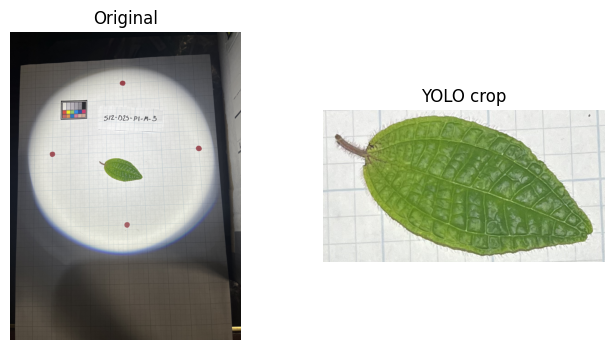

In [ ]:
show_yolo_crop_example(val_ds)

### Test 4: Cropping and Normal BCE w/ One Classifier Layer

In [ ]:
classifier4 = torch.nn.Linear(embedding_dim, len(labels))
classifier4 = classifier4.to(device)

In [ ]:
optimizer4 = torch.optim.AdamW(
    classifier4.parameters(),
    lr=1e-4,
    weight_decay=1e-3
)

In [ ]:
# v1
classifier4.train()
for epoch in range(15):
    total_loss = 0.0
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        optimizer.zero_grad()
        features = model.encode_image(images)
        features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier4(features)
        loss = criterion(logits, targets)
        loss.backward()
        optimizer4.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

Epoch 1, Loss: 0.6661255022129381
Epoch 2, Loss: 0.6310716551470469
Epoch 3, Loss: 0.601440294679389
Epoch 4, Loss: 0.5771744947835623
Epoch 5, Loss: 0.5588871527867145
Epoch 6, Loss: 0.5433229821992208
Epoch 7, Loss: 0.5341812982616654
Epoch 8, Loss: 0.5311073194067162
Epoch 9, Loss: 0.5248629371803927
Epoch 10, Loss: 0.5278290987732899
Epoch 11, Loss: 0.5283545234117163
Epoch 12, Loss: 0.5302424883267965
Epoch 13, Loss: 0.5330176856144365
Epoch 14, Loss: 0.5349462833031114
Epoch 15, Loss: 0.538175949490214


In [ ]:
classifier4.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for images, targets in val_loader:
        images = images.to(device)
        targets = targets.to(device)

        features = model.encode_image(images)
        features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier4(features)
        probs = torch.sigmoid(logits)

        all_preds.append(probs.cpu().numpy())
        all_targets.append(targets.cpu().numpy())

y_pred4 = np.concatenate(all_preds, axis=0)
y_true4 = np.concatenate(all_targets, axis=0)

y_bin4 = (y_pred4 >= 0.4).astype(int)

healthy_index = damages.index("healthy")
for i in range(len(y_bin4)):
    if y_bin4[i].sum() == 0:  # no label predicted
        y_bin4[i][healthy_index] = 1

print("Micro F1:", f1_score(y_true4, y_bin4, average="micro"))
print("Macro F1:", f1_score(y_true4, y_bin4, average="macro"))

print(classification_report(y_true4, y_bin4, target_names=damages, zero_division=0))

Micro F1: 0.4010989010989011
Macro F1: 0.18486286919831224
                   precision    recall  f1-score   support

          healthy       0.27      0.29      0.28        38
             rust       0.50      0.90      0.65        69
       leaf_miner       0.00      0.00      0.00        24
     other_insect       0.00      0.00      0.00        42
mechanical_damage       0.00      0.00      0.00        27

        micro avg       0.45      0.36      0.40       200
        macro avg       0.15      0.24      0.18       200
     weighted avg       0.22      0.36      0.28       200
      samples avg       0.45      0.34      0.37       200



### Test 5: Basic BCE w/ Multi-layer Classification Head

(Best Result)

In [ ]:
classifier5 = torch.nn.Sequential(
    torch.nn.Linear(embedding_dim, 512),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(512, len(labels))
).to(device)

optimizer5 = torch.optim.AdamW(
    classifier5.parameters(),
    lr=1e-4,
    weight_decay=1e-3
)

In [ ]:
# v1
classifier5.train()
for epoch in range(15):
    total_loss = 0.0
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        optimizer5.zero_grad()
        features = model.encode_image(images)
        features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier5(features)
        loss = criterion(logits, targets)
        loss.backward()
        optimizer5.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

Epoch 1, Loss: 0.6356169279799404
Epoch 2, Loss: 0.5556916289300804
Epoch 3, Loss: 0.5702673516359674
Epoch 4, Loss: 0.5285872899624239
Epoch 5, Loss: 0.5393123217375881
Epoch 6, Loss: 0.5065595658428698
Epoch 7, Loss: 0.5030072115990053
Epoch 8, Loss: 0.4880068646856101
Epoch 9, Loss: 0.47833957945007877
Epoch 10, Loss: 0.4661267794758441
Epoch 11, Loss: 0.448668076690421
Epoch 12, Loss: 0.43273940107908593
Epoch 13, Loss: 0.4303135598998472
Epoch 14, Loss: 0.40804917823119335
Epoch 15, Loss: 0.4214030051805887


### Stats Functions

In [27]:
# Rewrote the get stats function to not constantly duplicate my stats code (:

def get_stats(curr_classifier, loader):
  curr_classifier.eval()
  all_preds = []
  all_targets = []

  with torch.no_grad():
      for images, targets in loader:
          images = images.to(device)
          targets = targets.to(device)

          features = model.encode_image(images)
          features = features / features.norm(dim=-1, keepdim=True)

          logits = curr_classifier(features)
          probs = torch.sigmoid(logits)

          all_preds.append(probs.cpu().numpy())
          all_targets.append(targets.cpu().numpy())

  y_pred = np.concatenate(all_preds, axis=0)
  y_true = np.concatenate(all_targets, axis=0)

  y_bin = (y_pred >= 0.4).astype(int)

  healthy_index = damages.index("healthy")
  for i in range(len(y_bin)):
      if y_bin[i].sum() == 0:  # no label predicted
          y_bin[i][healthy_index] = 1

  print("Micro F1:", f1_score(y_true, y_bin, average="micro"))
  print("Macro F1:", f1_score(y_true, y_bin, average="macro"))

  print(classification_report(y_true, y_bin, target_names=damages, zero_division=0, digits=3))

  print("\nPer-class ROC AUC:")
  for i, label in enumerate(damages):
      if y_true[:, i].sum() > 0:
          auc = roc_auc_score(y_true[:, i], y_pred[:, i])
          print(f"{label:20s}: {auc:.4f}")
      else:
          print(f"{label:20s}: skipped (no positives)")

In [ ]:
get_stats(classifier5, val_loader)

Micro F1: 0.565947242206235
Macro F1: 0.50358052379105
                   precision    recall  f1-score   support

          healthy      0.438     0.842     0.577        38
             rust      0.547     0.841     0.663        69
       leaf_miner      0.643     0.375     0.474        24
     other_insect      0.923     0.286     0.436        42
mechanical_damage      0.636     0.259     0.368        27

        micro avg      0.544     0.590     0.566       200
        macro avg      0.638     0.521     0.504       200
     weighted avg      0.629     0.590     0.536       200
      samples avg      0.567     0.586     0.551       200


Per-class ROC AUC:
healthy             : 0.8747
rust                : 0.8003
leaf_miner          : 0.8896
other_insect        : 0.9169
mechanical_damage   : 0.8024


In [28]:
# Replaces basic-f1 with 0.5 threshold for everything with custom thresholds per class

def get_stats_with_f1(curr_classifier, loader, threshold_grid=100):
    curr_classifier.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for images, targets in loader:
            images = images.to(device)
            targets = targets.to(device)

            features = model.encode_image(images)
            features = features / features.norm(dim=-1, keepdim=True)

            logits = curr_classifier(features)
            probs = torch.sigmoid(logits)

            all_preds.append(probs.cpu().numpy())
            all_targets.append(targets.cpu().numpy())

    y_pred = np.concatenate(all_preds, axis=0)
    y_true = np.concatenate(all_targets, axis=0)

    # per-class F1-optimal thresholds
    thresholds = np.linspace(0.0, 1.0, threshold_grid)
    best_thresholds = np.zeros(y_true.shape[1])

    for i in range(y_true.shape[1]):
        if y_true[:, i].sum() == 0:
            best_thresholds[i] = 0.5
            continue

        f1_scores = []
        for t in thresholds:
            y_bin = (y_pred[:, i] >= t).astype(int)
            f1_scores.append(f1_score(y_true[:, i], y_bin))
        best_thresholds[i] = thresholds[np.argmax(f1_scores)]

    y_bin_opt = (y_pred >= best_thresholds).astype(int)

    # healthy default
    healthy_index = damages.index("healthy")
    for i in range(len(y_bin_opt)):
        if y_bin_opt[i].sum() == 0:
            y_bin_opt[i][healthy_index] = 1

    print("Per-class optimal thresholds:", dict(zip(damages, best_thresholds.round(3))))
    print("Micro F1:", f1_score(y_true, y_bin_opt, average="micro"))
    print("Macro F1:", f1_score(y_true, y_bin_opt, average="macro"))
    print(classification_report(y_true, y_bin_opt, target_names=damages, zero_division=0, digits=3))

    print("\nPer-class ROC AUC:")
    for i, label in enumerate(damages):
        if y_true[:, i].sum() > 0:
            auc = roc_auc_score(y_true[:, i], y_pred[:, i])
            print(f"{label:20s}: {auc:.4f}")
        else:
            print(f"{label:20s}: skipped (no positives)")


In [ ]:
get_stats_with_f1(classifier5, val_loader)

Per-class optimal thresholds: {'healthy': np.float64(0.586), 'rust': np.float64(0.515), 'leaf_miner': np.float64(0.343), 'other_insect': np.float64(0.141), 'mechanical_damage': np.float64(0.253)}
Micro F1: 0.6681818181818182
Macro F1: 0.6478732661739109
                   precision    recall  f1-score   support

          healthy      0.536     0.789     0.638        38
             rust      0.640     0.797     0.710        69
       leaf_miner      0.600     0.625     0.612        24
     other_insect      0.762     0.762     0.762        42
mechanical_damage      0.484     0.556     0.517        27

        micro avg      0.613     0.735     0.668       200
        macro avg      0.604     0.706     0.648       200
     weighted avg      0.620     0.735     0.669       200
      samples avg      0.618     0.696     0.633       200


Per-class ROC AUC:
healthy             : 0.8747
rust                : 0.8003
leaf_miner          : 0.8896
other_insect        : 0.9169
mechanical_damage

In [ ]:
get_stats_with_f1(classifier5, test_loader)

Per-class optimal thresholds: {'healthy': np.float64(0.475), 'rust': np.float64(0.465), 'leaf_miner': np.float64(0.242), 'other_insect': np.float64(0.071), 'mechanical_damage': np.float64(0.222)}
Micro F1: 0.6470588235294118
Macro F1: 0.6160139735097144
                   precision    recall  f1-score   support

          healthy      0.597     0.889     0.714        45
             rust      0.629     0.848     0.723        66
       leaf_miner      0.605     0.684     0.642        38
     other_insect      0.405     0.630     0.493        27
mechanical_damage      0.469     0.556     0.508        27

        micro avg      0.564     0.759     0.647       203
        macro avg      0.541     0.721     0.616       203
     weighted avg      0.566     0.759     0.647       203
      samples avg      0.621     0.742     0.652       203


Per-class ROC AUC:
healthy             : 0.8602
rust                : 0.7969
leaf_miner          : 0.8324
other_insect        : 0.8052
mechanical_damage

### Test 6: Include Validation in Fine Tuning

In [ ]:
classifier6 = torch.nn.Sequential(
    torch.nn.Linear(embedding_dim, 512),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(512, len(labels))
).to(device)

optimizer6 = torch.optim.AdamW(
    classifier6.parameters(),
    lr=1e-4,
    weight_decay=1e-3
)

In [ ]:
for epoch in range(15):
    classifier6.train()
    total_loss = 0.0
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        optimizer6.zero_grad()
        with torch.no_grad():
          features = model.encode_image(images)
          features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier6(features)
        loss = criterion(logits, targets)
        loss.backward()
        optimizer6.step()
        total_loss += loss.item()

    classifier6.eval()
    val_loss = 0.0

    with torch.no_grad():
        for images, targets in val_loader:
            images = images.to(device)
            targets = targets.to(device)

            features = model.encode_image(images)
            features = features / features.norm(dim=-1, keepdim=True)

            logits = classifier6(features)
            loss = criterion(logits, targets)
            val_loss += loss.item()

    print(f"Epoch {epoch+1}, Train Loss: {total_loss / len(train_loader)}, Val Loss: {val_loss / len(val_loader)}")

Epoch 1, Train Loss: 0.6618753082780953, Val Loss: 0.6166020794348284
Epoch 2, Train Loss: 0.5767048827136856, Val Loss: 0.5438152605837042
Epoch 3, Train Loss: 0.5401837556477053, Val Loss: 0.5320464291355826
Epoch 4, Train Loss: 0.529946741210409, Val Loss: 0.5277738869190216
Epoch 5, Train Loss: 0.5273777627083193, Val Loss: 0.5228117839856581
Epoch 6, Train Loss: 0.5198872405362417, Val Loss: 0.516574041409926
Epoch 7, Train Loss: 0.5172022947345871, Val Loss: 0.5111825168132782
Epoch 8, Train Loss: 0.5084631443023682, Val Loss: 0.506543598391793
Epoch 9, Train Loss: 0.5082905615668699, Val Loss: 0.4993030510165475
Epoch 10, Train Loss: 0.49991893409246424, Val Loss: 0.493676096200943
Epoch 11, Train Loss: 0.49359801555254373, Val Loss: 0.4862287098711187
Epoch 12, Train Loss: 0.48495301352926046, Val Loss: 0.47942700711163605
Epoch 13, Train Loss: 0.4822451378925737, Val Loss: 0.4736036712473089
Epoch 14, Train Loss: 0.47582587958818456, Val Loss: 0.4674300524321469
Epoch 15, Trai

In [ ]:
get_stats(classifier6, test_loader)

Micro F1: 0.48293963254593175
Macro F1: 0.31796920873612605
                   precision    recall  f1-score   support

          healthy      0.421     0.421     0.421        38
             rust      0.488     0.899     0.633        69
       leaf_miner      1.000     0.042     0.080        24
     other_insect      0.867     0.310     0.456        42
mechanical_damage      0.000     0.000     0.000        27

        micro avg      0.508     0.460     0.483       200
        macro avg      0.555     0.334     0.318       200
     weighted avg      0.550     0.460     0.404       200
      samples avg      0.503     0.444     0.453       200


Per-class ROC AUC:
healthy             : 0.8488
rust                : 0.7579
leaf_miner          : 0.8298
other_insect        : 0.8886
mechanical_damage   : 0.7472


In [ ]:
get_stats_with_f1(classifier6, test_loader)

Per-class optimal thresholds: {'healthy': np.float64(0.303), 'rust': np.float64(0.444), 'leaf_miner': np.float64(0.232), 'other_insect': np.float64(0.283), 'mechanical_damage': np.float64(0.242)}
Micro F1: 0.6077586206896551
Macro F1: 0.5786207679728667
                   precision    recall  f1-score   support

          healthy      0.561     0.605     0.582        38
             rust      0.604     0.797     0.688        69
       leaf_miner      0.339     0.792     0.475        24
     other_insect      0.696     0.762     0.727        42
mechanical_damage      0.400     0.444     0.421        27

        micro avg      0.534     0.705     0.608       200
        macro avg      0.520     0.680     0.579       200
     weighted avg      0.556     0.705     0.614       200
      samples avg      0.530     0.665     0.564       200


Per-class ROC AUC:
healthy             : 0.8488
rust                : 0.7579
leaf_miner          : 0.8298
other_insect        : 0.8886
mechanical_damage

### Test 7: Cropping and Normal BCE w/ Multi-label Classification

In [ ]:
train_ds_l = LeafDamageDataset(train_ds, preprocess_train, True)
val_ds_l   = LeafDamageDataset(val_ds, preprocess_val, True)
test_ds_l   = LeafDamageDataset(test_ds, preprocess_val, True)

In [ ]:
train_loader2 = DataLoader(
    train_ds_l,
    batch_size=16,
    shuffle=True,
    num_workers=0
)

val_loader2 = DataLoader(
    val_ds_l,
    batch_size=16,
    shuffle=False,
    num_workers=0
)

test_loader2 = DataLoader(
    test_ds_l,
    batch_size=16,
    shuffle=False,
    num_workers=0
)

In [ ]:
classifier7 = torch.nn.Sequential(
    torch.nn.Linear(embedding_dim, 512),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(512, len(labels))
).to(device)

optimizer7 = torch.optim.AdamW(
    classifier7.parameters(),
    lr=1e-4,
    weight_decay=1e-3
)

In [ ]:
classifier7.train()
for epoch in range(5):
    total_loss = 0.0
    for images, targets in train_loader2:
        images, targets = images.to(device), targets.to(device)

        optimizer7.zero_grad()
        features = model.encode_image(images)
        features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier7(features)
        loss = criterion(logits, targets)
        loss.backward()
        optimizer7.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader2)}")

Epoch 1, Loss: 0.4197050413812499
Epoch 2, Loss: 0.42023651535252493
Epoch 3, Loss: 0.4159949676818158
Epoch 4, Loss: 0.410061481128256
Epoch 5, Loss: 0.4090278245598437


#### 15 epochs

In [ ]:
get_stats(classifier7, test_loader2)

Micro F1: 0.46236559139784944
Macro F1: 0.2654754693205196
                   precision    recall  f1-score   support

          healthy      0.550     0.489     0.518        45
             rust      0.496     0.924     0.646        66
       leaf_miner      0.667     0.053     0.098        38
     other_insect      0.333     0.037     0.067        27
mechanical_damage      0.000     0.000     0.000        27

        micro avg      0.509     0.424     0.462       203
        macro avg      0.409     0.301     0.265       203
     weighted avg      0.452     0.424     0.352       203
      samples avg      0.509     0.426     0.452       203


Per-class ROC AUC:
healthy             : 0.8641
rust                : 0.7567
leaf_miner          : 0.8094
other_insect        : 0.6849
mechanical_damage   : 0.7458


In [ ]:
get_stats(classifier7, val_loader2)

Micro F1: 0.46648793565683644
Macro F1: 0.29304564709608455
                   precision    recall  f1-score   support

          healthy      0.379     0.289     0.328        38
             rust      0.500     0.913     0.646        69
       leaf_miner      0.500     0.042     0.077        24
     other_insect      0.750     0.286     0.414        42
mechanical_damage      0.000     0.000     0.000        27

        micro avg      0.503     0.435     0.466       200
        macro avg      0.426     0.306     0.293       200
     weighted avg      0.462     0.435     0.381       200
      samples avg      0.488     0.420     0.438       200


Per-class ROC AUC:
healthy             : 0.8849
rust                : 0.7205
leaf_miner          : 0.8193
other_insect        : 0.8597
mechanical_damage   : 0.6915


In [ ]:
get_stats_with_f1(classifier7, test_loader2)

Per-class optimal thresholds: {'healthy': np.float64(0.202), 'rust': np.float64(0.414), 'leaf_miner': np.float64(0.232), 'other_insect': np.float64(0.232), 'mechanical_damage': np.float64(0.232)}
Micro F1: 0.6058252427184466
Macro F1: 0.58000521741115
                   precision    recall  f1-score   support

          healthy      0.613     0.844     0.710        45
             rust      0.532     0.879     0.663        66
       leaf_miner      0.519     0.737     0.609        38
     other_insect      0.314     0.593     0.410        27
mechanical_damage      0.444     0.593     0.508        27

        micro avg      0.500     0.768     0.606       203
        macro avg      0.484     0.729     0.580       203
     weighted avg      0.507     0.768     0.609       203
      samples avg      0.533     0.754     0.595       203


Per-class ROC AUC:
healthy             : 0.8641
rust                : 0.7567
leaf_miner          : 0.8094
other_insect        : 0.6849
mechanical_damage  

In [ ]:
get_stats_with_f1(classifier7, val_loader2)

Per-class optimal thresholds: {'healthy': np.float64(0.232), 'rust': np.float64(0.414), 'leaf_miner': np.float64(0.232), 'other_insect': np.float64(0.283), 'mechanical_damage': np.float64(0.222)}
Micro F1: 0.6034816247582205
Macro F1: 0.5867504082118804
                   precision    recall  f1-score   support

          healthy      0.659     0.711     0.684        38
             rust      0.527     0.855     0.652        69
       leaf_miner      0.333     0.833     0.476        24
     other_insect      0.618     0.810     0.701        42
mechanical_damage      0.327     0.593     0.421        27

        micro avg      0.492     0.780     0.603       200
        macro avg      0.493     0.760     0.587       200
     weighted avg      0.521     0.780     0.616       200
      samples avg      0.492     0.736     0.563       200


Per-class ROC AUC:
healthy             : 0.8849
rust                : 0.7205
leaf_miner          : 0.8193
other_insect        : 0.8597
mechanical_damage

#### 20 epochs

In [ ]:
get_stats(classifier7, test_loader2)

Micro F1: 0.4787234042553192
Macro F1: 0.30599740420969473
                   precision    recall  f1-score   support

          healthy      0.511     0.511     0.511        45
             rust      0.531     0.909     0.670        66
       leaf_miner      0.667     0.105     0.182        38
     other_insect      0.333     0.111     0.167        27
mechanical_damage      0.000     0.000     0.000        27

        micro avg      0.520     0.443     0.479       203
        macro avg      0.408     0.327     0.306       203
     weighted avg      0.455     0.443     0.387       203
      samples avg      0.515     0.447     0.467       203


Per-class ROC AUC:
healthy             : 0.8813
rust                : 0.7785
leaf_miner          : 0.8241
other_insect        : 0.7222
mechanical_damage   : 0.7568


In [ ]:
get_stats(classifier7, val_loader2)

Micro F1: 0.5284974093264249
Macro F1: 0.3955171065493646
                   precision    recall  f1-score   support

          healthy      0.514     0.500     0.507        38
             rust      0.513     0.870     0.645        69
       leaf_miner      0.500     0.167     0.250        24
     other_insect      0.792     0.452     0.576        42
mechanical_damage      0.000     0.000     0.000        27

        micro avg      0.548     0.510     0.528       200
        macro avg      0.464     0.398     0.396       200
     weighted avg      0.501     0.510     0.470       200
      samples avg      0.537     0.494     0.496       200


Per-class ROC AUC:
healthy             : 0.8914
rust                : 0.7545
leaf_miner          : 0.8378
other_insect        : 0.8802
mechanical_damage   : 0.7164


In [ ]:
get_stats_with_f1(classifier7, test_loader2)

Per-class optimal thresholds: {'healthy': np.float64(0.202), 'rust': np.float64(0.404), 'leaf_miner': np.float64(0.253), 'other_insect': np.float64(0.222), 'mechanical_damage': np.float64(0.242)}
Micro F1: 0.6168958742632613
Macro F1: 0.5879852909228674
                   precision    recall  f1-score   support

          healthy      0.594     0.911     0.719        45
             rust      0.547     0.879     0.674        66
       leaf_miner      0.542     0.684     0.605        38
     other_insect      0.340     0.630     0.442        27
mechanical_damage      0.455     0.556     0.500        27

        micro avg      0.513     0.773     0.617       203
        macro avg      0.496     0.732     0.588       203
     weighted avg      0.517     0.773     0.617       203
      samples avg      0.566     0.773     0.621       203


Per-class ROC AUC:
healthy             : 0.8813
rust                : 0.7785
leaf_miner          : 0.8241
other_insect        : 0.7222
mechanical_damage

In [ ]:
get_stats_with_f1(classifier7, val_loader2)

Per-class optimal thresholds: {'healthy': np.float64(0.273), 'rust': np.float64(0.424), 'leaf_miner': np.float64(0.232), 'other_insect': np.float64(0.333), 'mechanical_damage': np.float64(0.222)}
Micro F1: 0.6166328600405679
Macro F1: 0.6002893279099839
                   precision    recall  f1-score   support

          healthy      0.600     0.711     0.651        38
             rust      0.558     0.841     0.671        69
       leaf_miner      0.375     0.875     0.525        24
     other_insect      0.732     0.714     0.723        42
mechanical_damage      0.340     0.593     0.432        27

        micro avg      0.519     0.760     0.617       200
        macro avg      0.521     0.747     0.600       200
     weighted avg      0.551     0.760     0.628       200
      samples avg      0.518     0.718     0.575       200


Per-class ROC AUC:
healthy             : 0.8914
rust                : 0.7545
leaf_miner          : 0.8378
other_insect        : 0.8802
mechanical_damage

#### 25 epochs

In [ ]:
get_stats(classifier7, test_loader2)

Micro F1: 0.519280205655527
Macro F1: 0.4040849714118776
                   precision    recall  f1-score   support

          healthy      0.483     0.644     0.552        45
             rust      0.567     0.833     0.675        66
       leaf_miner      0.727     0.211     0.327        38
     other_insect      0.467     0.259     0.333        27
mechanical_damage      0.667     0.074     0.133        27

        micro avg      0.543     0.498     0.519       203
        macro avg      0.582     0.404     0.404       203
     weighted avg      0.578     0.498     0.465       203
      samples avg      0.539     0.502     0.506       203


Per-class ROC AUC:
healthy             : 0.8915
rust                : 0.7998
leaf_miner          : 0.8309
other_insect        : 0.7485
mechanical_damage   : 0.7697


In [ ]:
get_stats(classifier7, val_loader2)

Micro F1: 0.5750636132315522
Macro F1: 0.45036086233554073
                   precision    recall  f1-score   support

          healthy      0.556     0.658     0.602        38
             rust      0.556     0.870     0.678        69
       leaf_miner      0.545     0.250     0.343        24
     other_insect      0.786     0.524     0.629        42
mechanical_damage      0.000     0.000     0.000        27

        micro avg      0.585     0.565     0.575       200
        macro avg      0.488     0.460     0.450       200
     weighted avg      0.528     0.565     0.521       200
      samples avg      0.579     0.552     0.545       200


Per-class ROC AUC:
healthy             : 0.8929
rust                : 0.7840
leaf_miner          : 0.8518
other_insect        : 0.8907
mechanical_damage   : 0.7380


In [ ]:
get_stats_with_f1(classifier7, test_loader2)

Per-class optimal thresholds: {'healthy': np.float64(0.222), 'rust': np.float64(0.424), 'leaf_miner': np.float64(0.263), 'other_insect': np.float64(0.162), 'mechanical_damage': np.float64(0.253)}
Micro F1: 0.6234817813765182
Macro F1: 0.6039065968039117
                   precision    recall  f1-score   support

          healthy      0.645     0.889     0.748        45
             rust      0.589     0.803     0.679        66
       leaf_miner      0.578     0.684     0.627        38
     other_insect      0.312     0.741     0.440        27
mechanical_damage      0.500     0.556     0.526        27

        micro avg      0.529     0.759     0.623       203
        macro avg      0.525     0.734     0.604       203
     weighted avg      0.551     0.759     0.632       203
      samples avg      0.572     0.758     0.624       203


Per-class ROC AUC:
healthy             : 0.8915
rust                : 0.7998
leaf_miner          : 0.8309
other_insect        : 0.7485
mechanical_damage

In [ ]:
get_stats_with_f1(classifier7, val_loader2)

Per-class optimal thresholds: {'healthy': np.float64(0.303), 'rust': np.float64(0.434), 'leaf_miner': np.float64(0.263), 'other_insect': np.float64(0.354), 'mechanical_damage': np.float64(0.232)}
Micro F1: 0.6300211416490487
Macro F1: 0.609866958300444
                   precision    recall  f1-score   support

          healthy      0.565     0.684     0.619        38
             rust      0.622     0.812     0.704        69
       leaf_miner      0.400     0.833     0.541        24
     other_insect      0.756     0.738     0.747        42
mechanical_damage      0.348     0.593     0.438        27

        micro avg      0.546     0.745     0.630       200
        macro avg      0.538     0.732     0.610       200
     weighted avg      0.576     0.745     0.642       200
      samples avg      0.538     0.704     0.585       200


Per-class ROC AUC:
healthy             : 0.8929
rust                : 0.7840
leaf_miner          : 0.8518
other_insect        : 0.8907
mechanical_damage 

#### 30 epochs

In [ ]:
get_stats_with_f1(classifier7, test_loader2)

Per-class optimal thresholds: {'healthy': np.float64(0.212), 'rust': np.float64(0.465), 'leaf_miner': np.float64(0.232), 'other_insect': np.float64(0.172), 'mechanical_damage': np.float64(0.242)}
Micro F1: 0.639344262295082
Macro F1: 0.6186496019930425
                   precision    recall  f1-score   support

          healthy      0.625     0.889     0.734        45
             rust      0.685     0.758     0.719        66
       leaf_miner      0.569     0.763     0.652        38
     other_insect      0.339     0.741     0.465        27
mechanical_damage      0.447     0.630     0.523        27

        micro avg      0.547     0.768     0.639       203
        macro avg      0.533     0.756     0.619       203
     weighted avg      0.572     0.768     0.650       203
      samples avg      0.592     0.763     0.639       203


Per-class ROC AUC:
healthy             : 0.8974
rust                : 0.8162
leaf_miner          : 0.8336
other_insect        : 0.7614
mechanical_damage 

In [ ]:
get_stats_with_f1(classifier7, val_loader2)

Per-class optimal thresholds: {'healthy': np.float64(0.283), 'rust': np.float64(0.455), 'leaf_miner': np.float64(0.283), 'other_insect': np.float64(0.333), 'mechanical_damage': np.float64(0.253)}
Micro F1: 0.6359649122807017
Macro F1: 0.6126277923691716
                   precision    recall  f1-score   support

          healthy      0.500     0.763     0.604        38
             rust      0.658     0.754     0.703        69
       leaf_miner      0.471     0.667     0.552        24
     other_insect      0.717     0.786     0.750        42
mechanical_damage      0.385     0.556     0.455        27

        micro avg      0.566     0.725     0.636       200
        macro avg      0.546     0.705     0.613       200
     weighted avg      0.581     0.725     0.642       200
      samples avg      0.565     0.688     0.598       200


Per-class ROC AUC:
healthy             : 0.8908
rust                : 0.7994
leaf_miner          : 0.8690
other_insect        : 0.8975
mechanical_damage

## Why didn't I just use CLIP

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model, preprocess_train, preprocess_val = open_clip.create_model_and_transforms(model_name="ViT-B-16", pretrained="laion400m_e32")

tokenizer = open_clip.get_tokenizer("ViT-B-16")
model = model.to(device).eval()

open_clip_model.safetensors:   0%|          | 0.00/599M [00:00<?, ?B/s]

In [ ]:
# freeze clip
for param in model.parameters():
    param.requires_grad = False

### Test 8: CLIP normal BCE

In [ ]:
classifier8 = torch.nn.Sequential(
    torch.nn.Linear(embedding_dim, 512),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(512, len(damages))
).to(device)

optimizer8 = torch.optim.AdamW(
    classifier8.parameters(),
    lr=1e-4,
    weight_decay=1e-3
)

In [ ]:
for epoch in range(10):
    classifier8.train()
    total_loss = 0.0
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        optimizer8.zero_grad()
        with torch.no_grad():
          features = model.encode_image(images)
          features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier8(features)
        loss = criterion(logits, targets)
        loss.backward()
        optimizer8.step()
        total_loss += loss.item()

    # Validation
    classifier8.eval()
    val_loss = 0.0

    with torch.no_grad():
        for images, targets in val_loader:
            images, targets = images.to(device), targets.to(device)

            with torch.no_grad():
              features = model.encode_image(images)
              features = features / features.norm(dim=-1, keepdim=True)

            logits = classifier8(features)
            loss = criterion(logits, targets)
            val_loss += loss.item()

    print(f"Epoch {1+epoch}, Train Loss: {(total_loss / len(train_loader)):.4f}, Val Loss: {(val_loss / len(val_loader)):.4f}")

Epoch 1, Train Loss: 0.4439, Val Loss: 0.4442
Epoch 2, Train Loss: 0.4463, Val Loss: 0.4437
Epoch 3, Train Loss: 0.4440, Val Loss: 0.4438
Epoch 4, Train Loss: 0.4388, Val Loss: 0.4391
Epoch 5, Train Loss: 0.4415, Val Loss: 0.4397
Epoch 6, Train Loss: 0.4376, Val Loss: 0.4380
Epoch 7, Train Loss: 0.4349, Val Loss: 0.4370
Epoch 8, Train Loss: 0.4357, Val Loss: 0.4353
Epoch 9, Train Loss: 0.4321, Val Loss: 0.4341
Epoch 10, Train Loss: 0.4329, Val Loss: 0.4347


In [ ]:
# After 5 epochs
get_stats_with_f1(classifier8, test_loader)

Per-class optimal thresholds: {'healthy': np.float64(0.182), 'rust': np.float64(0.455), 'leaf_miner': np.float64(0.202), 'other_insect': np.float64(0.222), 'mechanical_damage': np.float64(0.0)}
Micro F1: 0.4287769784172662
Macro F1: 0.42934850643183975
                   precision    recall  f1-score   support

          healthy      0.375     0.600     0.462        45
             rust      0.542     0.788     0.642        66
       leaf_miner      0.267     0.737     0.392        38
     other_insect      0.278     0.556     0.370        27
mechanical_damage      0.164     1.000     0.281        27

        micro avg      0.303     0.734     0.429       203
        macro avg      0.325     0.736     0.429       203
     weighted avg      0.368     0.734     0.471       203
      samples avg      0.299     0.704     0.396       203


Per-class ROC AUC:
healthy             : 0.6270
rust                : 0.7534
leaf_miner          : 0.6463
other_insect        : 0.6065
mechanical_damage 

In [ ]:
# After 15 epochs
get_stats_with_f1(classifier8, test_loader)

Per-class optimal thresholds: {'healthy': np.float64(0.242), 'rust': np.float64(0.444), 'leaf_miner': np.float64(0.222), 'other_insect': np.float64(0.283), 'mechanical_damage': np.float64(0.212)}
Micro F1: 0.5588235294117647
Macro F1: 0.5305769727365215
                   precision    recall  f1-score   support

          healthy      0.486     0.800     0.605        45
             rust      0.585     0.727     0.649        66
       leaf_miner      0.468     0.579     0.518        38
     other_insect      0.500     0.444     0.471        27
mechanical_damage      0.326     0.556     0.411        27

        micro avg      0.487     0.655     0.559       203
        macro avg      0.473     0.621     0.531       203
     weighted avg      0.496     0.655     0.559       203
      samples avg      0.502     0.651     0.544       203


Per-class ROC AUC:
healthy             : 0.7367
rust                : 0.7447
leaf_miner          : 0.7632
other_insect        : 0.7050
mechanical_damage

Epoch 16, Train Loss: 0.4876, Val Loss: 0.4815

Epoch 17, Train Loss: 0.4839, Val Loss: 0.4784

Epoch 18, Train Loss: 0.4792, Val Loss: 0.4749

Epoch 19, Train Loss: 0.4782, Val Loss: 0.4714

Epoch 20, Train Loss: 0.4754, Val Loss: 0.4696

Epoch 21, Train Loss: 0.4711, Val Loss: 0.4654

Epoch 22, Train Loss: 0.4680, Val Loss: 0.4633

Epoch 23, Train Loss: 0.4665, Val Loss: 0.4598

Epoch 24, Train Loss: 0.4641, Val Loss: 0.4586

Epoch 25, Train Loss: 0.4617, Val Loss: 0.4557

Epoch 26, Train Loss: 0.4570, Val Loss: 0.4541

Epoch 27, Train Loss: 0.4567, Val Loss: 0.4533

Epoch 28, Train Loss: 0.4509, Val Loss: 0.4498

Epoch 29, Train Loss: 0.4518, Val Loss: 0.4465

Epoch 30, Train Loss: 0.4469, Val Loss: 0.4461

Epoch 31, Train Loss: 0.4439, Val Loss: 0.4442

Epoch 32, Train Loss: 0.4463, Val Loss: 0.4437

Epoch 33, Train Loss: 0.4440, Val Loss: 0.4438

Epoch 34, Train Loss: 0.4388, Val Loss: 0.4391

Epoch 35, Train Loss: 0.4415, Val Loss: 0.4397

Epoch 36, Train Loss: 0.4376, Val Loss: 0.4380

Epoch 37, Train Loss: 0.4349, Val Loss: 0.4370

Epoch 38, Train Loss: 0.4357, Val Loss: 0.4353

Epoch 39, Train Loss: 0.4321, Val Loss: 0.4341

Epoch 40, Train Loss: 0.4329, Val Loss: 0.4347

In [ ]:
# After 20 epochs
get_stats_with_f1(classifier8, test_loader)

Per-class optimal thresholds: {'healthy': np.float64(0.273), 'rust': np.float64(0.465), 'leaf_miner': np.float64(0.232), 'other_insect': np.float64(0.283), 'mechanical_damage': np.float64(0.222)}
Micro F1: 0.5842696629213483
Macro F1: 0.560679288914583
                   precision    recall  f1-score   support

          healthy      0.507     0.844     0.633        45
             rust      0.652     0.652     0.652        66
       leaf_miner      0.583     0.553     0.568        38
     other_insect      0.542     0.481     0.510        27
mechanical_damage      0.366     0.556     0.441        27

        micro avg      0.537     0.640     0.584       203
        macro avg      0.530     0.617     0.561       203
     weighted avg      0.554     0.640     0.585       203
      samples avg      0.551     0.639     0.570       203


Per-class ROC AUC:
healthy             : 0.7644
rust                : 0.7482
leaf_miner          : 0.7824
other_insect        : 0.7348
mechanical_damage 

In [ ]:
# After 30 epochs
get_stats_with_f1(classifier8, test_loader)

Per-class optimal thresholds: {'healthy': np.float64(0.333), 'rust': np.float64(0.434), 'leaf_miner': np.float64(0.283), 'other_insect': np.float64(0.293), 'mechanical_damage': np.float64(0.242)}
Micro F1: 0.6143187066974596
Macro F1: 0.5874879370177186
                   precision    recall  f1-score   support

          healthy      0.513     0.889     0.650        45
             rust      0.644     0.712     0.676        66
       leaf_miner      0.667     0.474     0.554        38
     other_insect      0.591     0.481     0.531        27
mechanical_damage      0.500     0.556     0.526        27

        micro avg      0.578     0.655     0.614       203
        macro avg      0.583     0.622     0.587       203
     weighted avg      0.593     0.655     0.608       203
      samples avg      0.589     0.655     0.601       203


Per-class ROC AUC:
healthy             : 0.8030
rust                : 0.7594
leaf_miner          : 0.8058
other_insect        : 0.7778
mechanical_damage

In [ ]:
# After 40 epochs
get_stats_with_f1(classifier8, test_loader)

Per-class optimal thresholds: {'healthy': np.float64(0.343), 'rust': np.float64(0.434), 'leaf_miner': np.float64(0.242), 'other_insect': np.float64(0.323), 'mechanical_damage': np.float64(0.263)}
Micro F1: 0.6211453744493393
Macro F1: 0.5945916925815278
                   precision    recall  f1-score   support

          healthy      0.565     0.867     0.684        45
             rust      0.613     0.742     0.671        66
       leaf_miner      0.521     0.658     0.581        38
     other_insect      0.542     0.481     0.510        27
mechanical_damage      0.500     0.556     0.526        27

        micro avg      0.562     0.695     0.621       203
        macro avg      0.548     0.661     0.595       203
     weighted avg      0.560     0.695     0.617       203
      samples avg      0.581     0.683     0.607       203


Per-class ROC AUC:
healthy             : 0.8250
rust                : 0.7643
leaf_miner          : 0.8187
other_insect        : 0.8019
mechanical_damage

### Test 9: CLIP + YOLO normal BCE

In [ ]:
train_loader2

In [ ]:
classifier9 = torch.nn.Sequential(
    torch.nn.Linear(embedding_dim, 512),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(512, len(damages))
).to(device)

optimizer9 = torch.optim.AdamW(
    classifier9.parameters(),
    lr=1e-4,
    weight_decay=1e-3
)

In [26]:
for epoch in range(15):
    classifier9.train()
    total_loss = 0.0
    for images, targets in train_loader2:
        images, targets = images.to(device), targets.to(device)

        optimizer9.zero_grad()
        with torch.no_grad():
          features = model.encode_image(images)
          features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier9(features)
        loss = criterion(logits, targets)
        loss.backward()
        optimizer9.step()
        total_loss += loss.item()

    # Validation
    classifier9.eval()
    val_loss = 0.0

    with torch.no_grad():
        for images, targets in val_loader2:
            images, targets = images.to(device), targets.to(device)

            with torch.no_grad():
              features = model.encode_image(images)
              features = features / features.norm(dim=-1, keepdim=True)

            logits = classifier9(features)
            loss = criterion(logits, targets)
            val_loss += loss.item()

    print(f"Epoch {1+epoch}, Train Loss: {(total_loss / len(train_loader2)):.4f}, Val Loss: {(val_loss / len(val_loader2)):.4f}")

Epoch 1, Train Loss: 0.6545, Val Loss: 0.6076
Epoch 2, Train Loss: 0.5729, Val Loss: 0.5453
Epoch 3, Train Loss: 0.5392, Val Loss: 0.5369
Epoch 4, Train Loss: 0.5409, Val Loss: 0.5333
Epoch 5, Train Loss: 0.5340, Val Loss: 0.5291
Epoch 6, Train Loss: 0.5304, Val Loss: 0.5255
Epoch 7, Train Loss: 0.5269, Val Loss: 0.5209
Epoch 8, Train Loss: 0.5201, Val Loss: 0.5180
Epoch 9, Train Loss: 0.5163, Val Loss: 0.5137
Epoch 10, Train Loss: 0.5167, Val Loss: 0.5093
Epoch 11, Train Loss: 0.5096, Val Loss: 0.5053
Epoch 12, Train Loss: 0.5068, Val Loss: 0.5017
Epoch 13, Train Loss: 0.5074, Val Loss: 0.4954
Epoch 14, Train Loss: 0.5005, Val Loss: 0.4926
Epoch 15, Train Loss: 0.4963, Val Loss: 0.4884


In [31]:
classifier9.eval()

Sequential(
  (0): Linear(in_features=512, out_features=512, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=512, out_features=5, bias=True)
)

In [33]:
get_stats_with_f1(classifier9, test_loader2)

Per-class optimal thresholds: {'healthy': np.float64(0.222), 'rust': np.float64(0.424), 'leaf_miner': np.float64(0.192), 'other_insect': np.float64(0.263), 'mechanical_damage': np.float64(0.212)}
Micro F1: 0.55859375
Macro F1: 0.5278444250169989
                   precision    recall  f1-score   support

          healthy      0.508     0.711     0.593        45
             rust      0.571     0.788     0.662        66
       leaf_miner      0.379     0.868     0.528        38
     other_insect      0.444     0.444     0.444        27
mechanical_damage      0.341     0.519     0.412        27

        micro avg      0.463     0.704     0.559       203
        macro avg      0.449     0.666     0.528       203
     weighted avg      0.474     0.704     0.559       203
      samples avg      0.480     0.683     0.538       203


Per-class ROC AUC:
healthy             : 0.7904
rust                : 0.7573
leaf_miner          : 0.7532
other_insect        : 0.6806
mechanical_damage   : 0.7

### Zero-Shot w/ CLIP

In [ ]:
damages = [
    "healthy",
    "rust",
    "leaf_miner",
    "other_insect",
    "mechanical_damage"
]

In [ ]:
labels = {
    "healthy": "a healthy leaf with no visible damage",
    "rust": "a leaf with rust disease spots",
    "leaf_miner": "a leaf damaged by leaf miner insects",
    "other_insect": "a leaf damaged by insects",
    "mechanical_damage": "a leaf with mechanical or physical damage"
}

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
texts = [labels[l] for l in damages]
text_tokens = tokenizer(texts).to(device)

with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)

In [ ]:
all_scores = []
all_targets = []

for ex in tqdm(ds):
    # image
    image = preprocess_val(ex["image"]).unsqueeze(0).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image)
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)

        scores = (image_features @ text_features.T).squeeze(0)
        probs = torch.sigmoid(scores).cpu().numpy()

    all_scores.append(probs)

    # ground truth (yes=1, no or maybe = 0)
    gt = []
    for label in labels:
        val = ex.get(label, "No")
        gt.append(1 if val == "Yes" else 0)

    all_targets.append(gt)

100%|██████████| 1642/1642 [16:34<00:00,  1.65it/s]


In [ ]:
y_pred_scores = np.array(all_scores)
y_true = np.array(all_targets).astype(int)

In [ ]:
# per-class F1-optimal thresholds
thresholds = np.linspace(0.0, 1.0, 101)
best_thresholds = np.zeros(y_true.shape[1])

for i in range(y_true.shape[1]):
    # skip classes with no positives
    if y_true[:, i].sum() == 0:
        best_thresholds[i] = 0.5
        continue

    f1s = []
    for t in thresholds:
        y_bin = (y_pred_scores[:, i] >= t).astype(int)
        f1s.append(f1_score(y_true[:, i], y_bin, zero_division=0))

    best_thresholds[i] = thresholds[np.argmax(f1s)]

# apply per-class thresholds (broadcasting)
y_bin_opt = (y_pred_scores >= best_thresholds).astype(int)

# healthy fallback
healthy_index = damages.index("healthy")
for i in range(len(y_bin_opt)):
    if y_bin_opt[i].sum() == 0:
        y_bin_opt[i][healthy_index] = 1

print("Per-class optimal thresholds:")
for d, t in zip(damages, best_thresholds):
    print(f"{d:20s}: {t:.3f}")

print("\nMicro F1:", f1_score(y_true, y_bin_opt, average="micro"))
print("Macro F1:", f1_score(y_true, y_bin_opt, average="macro"))

print("\nClassification report:")
print(classification_report(
    y_true,
    y_bin_opt,
    target_names=damages,
    zero_division=0,
    digits=3
))

print("\nPer-class ROC AUC:")
for i, label in enumerate(damages):
    if y_true[:, i].sum() > 0:
        auc = roc_auc_score(y_true[:, i], y_pred_scores[:, i])
        print(f"{label:20s}: {auc:.4f}")
    else:
        print(f"{label:20s}: skipped (no positives)")

Per-class optimal thresholds:
healthy             : 0.550
rust                : 0.000
leaf_miner          : 0.530
other_insect        : 0.000
mechanical_damage   : 0.560

Micro F1: 0.4187916622579621
Macro F1: 0.40435112635523635

Classification report:
                   precision    recall  f1-score   support

          healthy      0.203     0.990     0.337       314
             rust      0.453     1.000     0.624       744
       leaf_miner      0.208     0.997     0.345       341
     other_insect      0.223     1.000     0.365       366
mechanical_damage      0.233     0.715     0.352       305

        micro avg      0.268     0.956     0.419      2070
        macro avg      0.264     0.940     0.404      2070
     weighted avg      0.302     0.956     0.448      2070
      samples avg      0.272     0.906     0.405      2070


Per-class ROC AUC:
healthy             : 0.5702
rust                : 0.5126
leaf_miner          : 0.4352
other_insect        : 0.4276
mechanical_damage